Méthodes d'ensemble
===================

**Author:** Laurent Siksous




# Table des matières







## Preamble



### Imports



In [8]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

### Functions



In [2]:
# Display all
def display_all(df):
    with pd.option_context("display.max_rows", 100, "display.max_columns", 100): 
        display(df)

## Data Wrangling



### Load Data



In [3]:
raw = fetch_california_housing(as_frame=True)

df_raw = pd.DataFrame(data = np.c_[raw['data'], raw['target']],
                  columns = raw['feature_names'] + ['AvePrice'])

display_all(df_raw.describe(include='all').T)

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
AvePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


### Description des données



-   Affichons la description des données :



In [5]:
print(raw.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

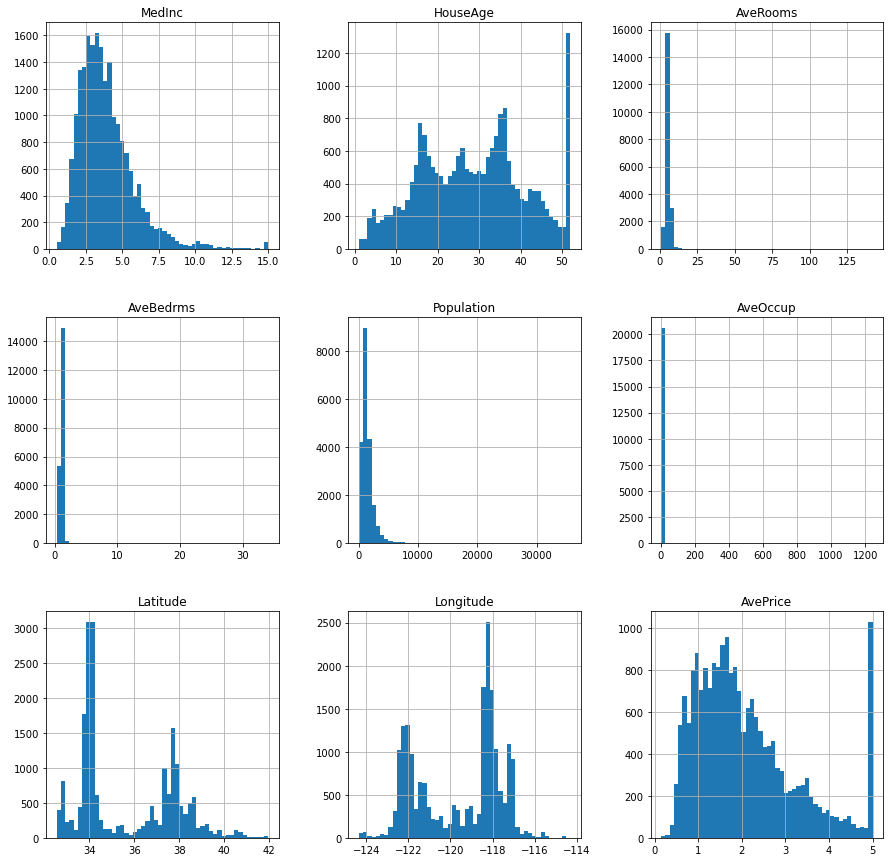

In [6]:
df_raw.hist(bins=50, figsize=(15,15))
plt.show()

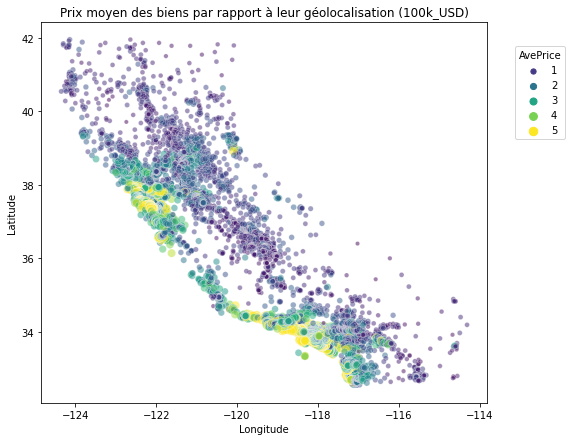

In [11]:
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_raw, x="Longitude", y="Latitude",
                size="AvePrice", hue="AvePrice",
                palette="viridis", alpha=0.5)
plt.legend(title="AvePrice", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
plt.title("Prix moyen des biens par rapport à leur géolocalisation (100k_USD)")
plt.show()

### Split the Data



In [1]:
train, test = train_test_split(df_raw, test_size=0.2, random_state=42, shuffle=True)

In [1]:
# save the train and test file
train.to_csv('data/train.csv', index=False)
test.to_csv('data/test.csv', index=False)

## Bibliography



### References:PROPERTIES:




[california.bib](california.bib)

